
# Análisis de Métricas de Repartidores


In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['axes.grid'] = True


In [11]:

df = pd.read_csv("metricas_repartidores.csv")
df.head()


,driver_id,region,sleep_hours,training_hours,delivery_rating,punctuality_percent,deliveries_count
0,D001,Bucaramanga,7.13,1.74,44.3,62.7,68
1,D002,Cali,5.11,1.73,40.3,62.8,57
2,D003,Bogotá,7.23,0.75,41.2,77.8,65
3,D004,Cali,6.07,2.03,47.3,86.7,75
4,D005,Barranquilla,8.27,2.82,71.1,86.0,73


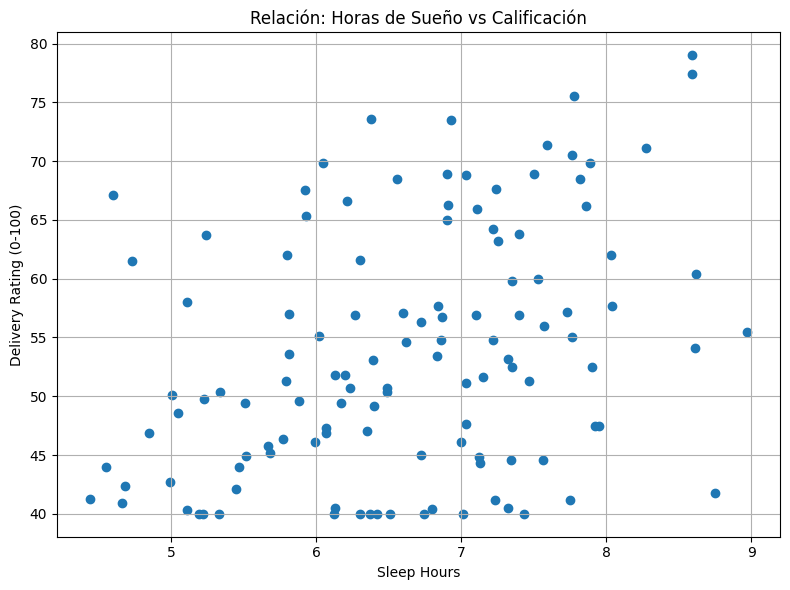

In [12]:

# grafico de puntos para ver la relacion entre horas de sueño y la calificacion de entrega
plt.figure()
plt.scatter(df['sleep_hours'], df['delivery_rating'])
plt.title('Relación: Horas de Sueño vs Calificación')
plt.xlabel('Sleep Hours')
plt.ylabel('Delivery Rating (0-100)')
plt.tight_layout()
plt.show()


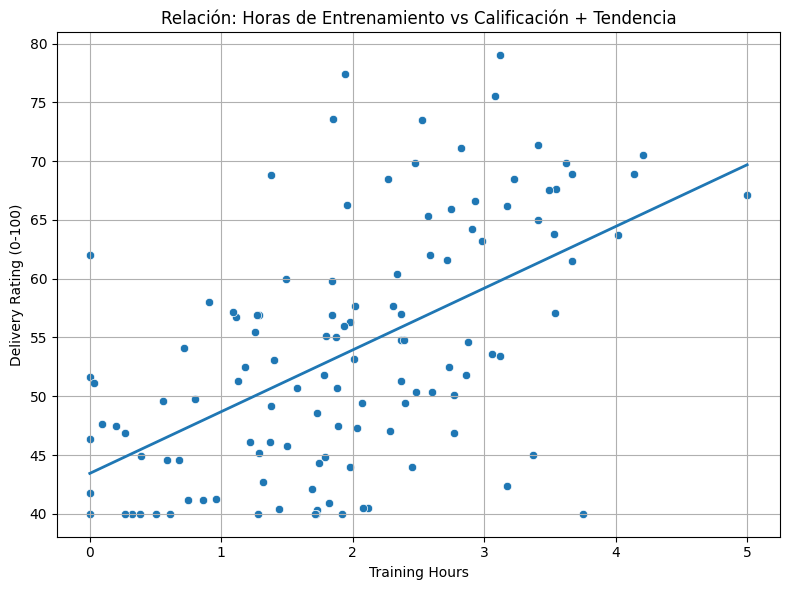

In [13]:

# Dispersión + línea de tendencia usando numpy.polyfit
plt.figure()
sns.scatterplot(x='training_hours', y='delivery_rating', data=df)

x = df['training_hours'].values
y = df['delivery_rating'].values
coef = np.polyfit(x, y, 1)
y_tendencia = np.poly1d(coef)(x)

orden = np.argsort(x)
plt.plot(x[orden], y_tendencia[orden], linewidth=2)

plt.title('Relación: Horas de Entrenamiento vs Calificación + Tendencia')
plt.xlabel('Training Hours')
plt.ylabel('Delivery Rating (0-100)')
plt.tight_layout()
plt.show()


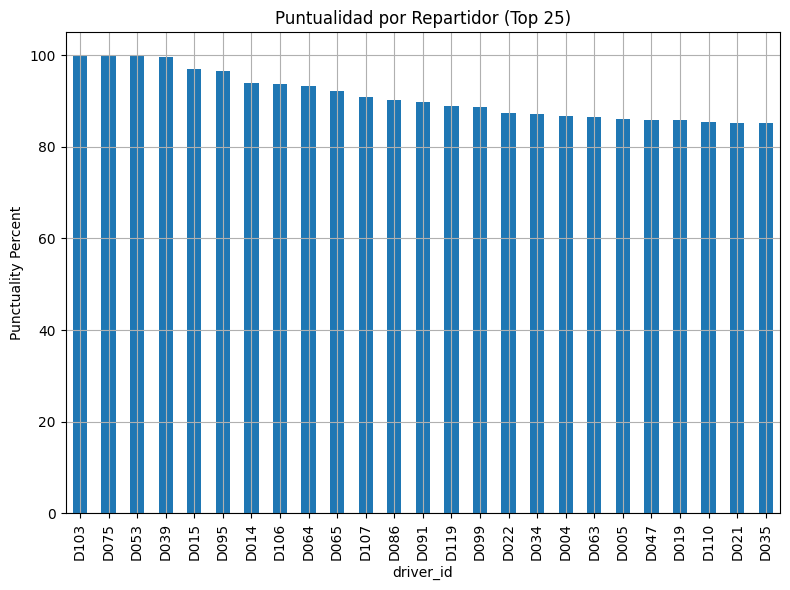

In [14]:

scores = df.set_index('driver_id').sort_values('punctuality_percent', ascending=False).head(25)

scores["punctuality_percent"].plot.bar()
plt.title('Puntualidad por Repartidor (Top 25)')
plt.ylabel('Punctuality Percent')
plt.tight_layout()
plt.show()


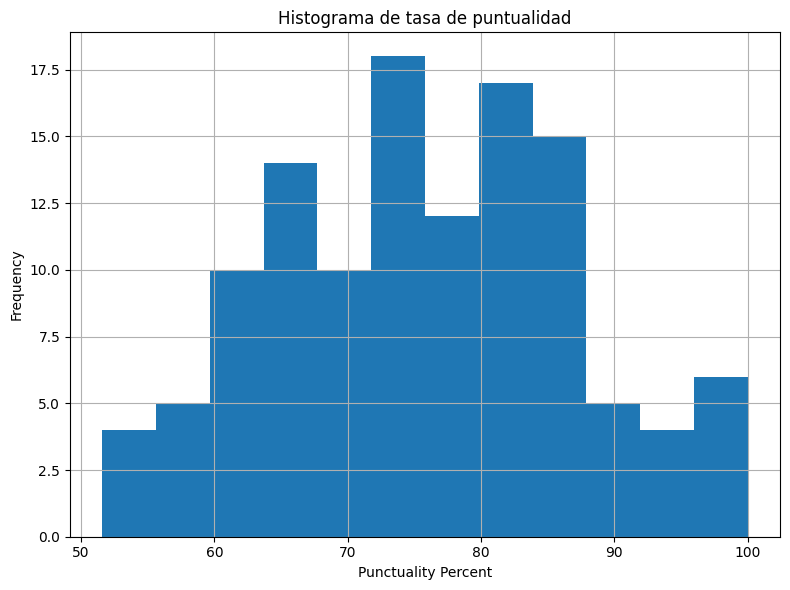

In [15]:

# Histograma de la tasa de puntualidad
ax = (df["punctuality_percent"]).plot.hist(bins=12)
plt.title('Histograma de tasa de puntualidad')
plt.xlabel('Punctuality Percent')
plt.tight_layout()
plt.show()
